# Batch processing of pressure data

In [1]:
#import libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

In [2]:
# to extract required data from collected samples
def extract_data(path):
    global time_stamps
    global node_list
    global pressure_list
    with open(path, 'r') as file:
        unfiltered_data = file.read()

    unfiltered_data = unfiltered_data.split('[')
    filtered_data = []

    for value in unfiltered_data:
        filtered_data.append(value.split(']'))

    filtered_data = filtered_data[1:]
    final_data = []
    
    for i in range(1, len(filtered_data), 4):
        for value in filtered_data[i]: 
            if value.strip():
                node_values = re.findall(r'\d+', value)
                node = [int(x) for x in node_values]

        for value in filtered_data[i+1]:
            if value.strip():
                pressure_values = re.findall(r'\d+', value)
                pressure = [int(x) for x in pressure_values]

        for value in filtered_data[i+2]:
            value = value.strip()
            
            if (i+2 == len(filtered_data)-1):
                value = value.split('\n')[0]
            if value:
                time = float(value)

        extract = list(zip(node, pressure))
        final_data.append([extract, time])

    return final_data


In [3]:
# init dataframe
def make_df(data):

    num_nodes = 64
    time_list = [entry[1] for entry in data]

    df = pd.DataFrame(0, index = time_list, columns = range(1,num_nodes+1))

    for i, [val,t] in enumerate(data):
        for n,p in val:
            df.at[time_list[i], n] = p

    return df

In [6]:
# path of directory; modify accordingly
dir = r"/mnt/g/textures/dataset/data processing/raw data"
target_dir = r"/mnt/g/textures/dataset/data processing/csv"
# animation_dir = r"/mnt/g/textures/pressure data processing/processed data"
f_names = os.listdir(dir)
file_paths = [os.path.join(dir, f) for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
# file_name = os.path.basename(file_paths[0])


for path in file_paths:

    # file names
    file_name = os.path.basename(path)
    file_stem = os.path.splitext(file_name)[0]
    csv_file_path = new_file_path = os.path.join(target_dir, f"{file_stem}.csv")
    # animation_file_path = os.path.join(animation_dir, f"{file_stem}.gif")

    dat = extract_data(path)
    df = make_df(dat)
    df.to_csv(csv_file_path, header='timestamp', index_label='nodes')
    # time_difference = pd.Timedelta(seconds=0.0165)
    # newdf = custom_retime_linear(df, time_difference)
    # newdf.to_csv(csv_file_path, header='timestamp', index_label='nodes')

    # fig, ax = plt.subplots()
    # im = ax.imshow(np.zeros((8, 8, 3), dtype=int)) 

    # def update(frame):
    #     pressure_data = newdf.iloc[frame]
    #     rgb_data = np.array([[map_2_gist_rainbow(value, 2**14-1) for value in row] for row in pressure_data.values.reshape((8, 8))])
    #     im.set_array(rgb_data)
    #     return im


    # ani = FuncAnimation(fig, update, frames=range(len(newdf)), interval=30)
    # plt.axis('off')
    # ani.save(animation_file_path, writer='pillow')
    # plt.close()



In [8]:
import os

def rename_files_in_directory(directory):
    # 获取目录中的所有文件
    for filename in os.listdir(directory):
        # 检查文件名是否以"S-"开头
        if filename.startswith("S-"):
            new_filename = "S" + filename[2:]  # 创建新的文件名
            old_file_path = os.path.join(directory, filename)
            new_file_path = os.path.join(directory, new_filename)
            os.rename(old_file_path, new_file_path)  # 重命名文件
            print(f"Renamed '{filename}' to '{new_filename}'")

# 指定目标目录
directory = r"/mnt/g/textures/dataset/data processing/csv"

# 调用函数进行重命名
rename_files_in_directory(directory)


Renamed 'S-046-f_5N_2500PPS_10.csv' to 'S046-f_5N_2500PPS_10.csv'
Renamed 'S-046-f_5N_2500PPS_11.csv' to 'S046-f_5N_2500PPS_11.csv'
Renamed 'S-046-f_5N_2500PPS_12.csv' to 'S046-f_5N_2500PPS_12.csv'
Renamed 'S-046-f_5N_2500PPS_13.csv' to 'S046-f_5N_2500PPS_13.csv'
Renamed 'S-046-f_5N_2500PPS_14.csv' to 'S046-f_5N_2500PPS_14.csv'
Renamed 'S-046-f_5N_2500PPS_15.csv' to 'S046-f_5N_2500PPS_15.csv'
Renamed 'S-046-f_5N_2500PPS_16.csv' to 'S046-f_5N_2500PPS_16.csv'
Renamed 'S-046-f_5N_2500PPS_17.csv' to 'S046-f_5N_2500PPS_17.csv'
Renamed 'S-046-f_5N_2500PPS_18.csv' to 'S046-f_5N_2500PPS_18.csv'
Renamed 'S-046-f_5N_2500PPS_19.csv' to 'S046-f_5N_2500PPS_19.csv'
Renamed 'S-046-f_5N_2500PPS_4.csv' to 'S046-f_5N_2500PPS_4.csv'
Renamed 'S-046-f_5N_2500PPS_5.csv' to 'S046-f_5N_2500PPS_5.csv'
Renamed 'S-046-f_5N_2500PPS_6.csv' to 'S046-f_5N_2500PPS_6.csv'
Renamed 'S-046-f_5N_2500PPS_7.csv' to 'S046-f_5N_2500PPS_7.csv'
Renamed 'S-046-f_5N_2500PPS_8.csv' to 'S046-f_5N_2500PPS_8.csv'
Renamed 'S-046-f_5N_

In [2]:
import os
import re

def rename_files_in_directory(directory):
    # 正则表达式用于匹配文件名开头是S0xx-的模式
    pattern = re.compile(r'^S0(\d{2}_)')

    # 获取目录中的所有文件
    for filename in os.listdir(directory):
        # 使用正则表达式查找匹配的文件名
        match = pattern.match(filename)
        if match:
            new_filename = "S" + filename[2:]  # 去掉文件名中的0
            old_file_path = os.path.join(directory, filename)
            new_file_path = os.path.join(directory, new_filename)
            os.rename(old_file_path, new_file_path)  # 重命名文件
            print(f"Renamed '{filename}' to '{new_filename}'")

# 指定目标目录
directory = r"/mnt/g/textures/dataset/data processing/csv"

# 调用函数进行重命名
rename_files_in_directory(directory)


Renamed 'S044_5N_2500PPS_0.csv' to 'S44_5N_2500PPS_0.csv'
Renamed 'S044_5N_2500PPS_1.csv' to 'S44_5N_2500PPS_1.csv'
Renamed 'S044_5N_2500PPS_10.csv' to 'S44_5N_2500PPS_10.csv'
Renamed 'S044_5N_2500PPS_11.csv' to 'S44_5N_2500PPS_11.csv'
Renamed 'S044_5N_2500PPS_12.csv' to 'S44_5N_2500PPS_12.csv'
Renamed 'S044_5N_2500PPS_13.csv' to 'S44_5N_2500PPS_13.csv'
Renamed 'S044_5N_2500PPS_14.csv' to 'S44_5N_2500PPS_14.csv'
Renamed 'S044_5N_2500PPS_15.csv' to 'S44_5N_2500PPS_15.csv'
Renamed 'S044_5N_2500PPS_16.csv' to 'S44_5N_2500PPS_16.csv'
Renamed 'S044_5N_2500PPS_17.csv' to 'S44_5N_2500PPS_17.csv'
Renamed 'S044_5N_2500PPS_18.csv' to 'S44_5N_2500PPS_18.csv'
Renamed 'S044_5N_2500PPS_19.csv' to 'S44_5N_2500PPS_19.csv'
Renamed 'S044_5N_2500PPS_2.csv' to 'S44_5N_2500PPS_2.csv'
Renamed 'S044_5N_2500PPS_3.csv' to 'S44_5N_2500PPS_3.csv'
Renamed 'S044_5N_2500PPS_4.csv' to 'S44_5N_2500PPS_4.csv'
Renamed 'S044_5N_2500PPS_5.csv' to 'S44_5N_2500PPS_5.csv'
Renamed 'S044_5N_2500PPS_6.csv' to 'S44_5N_2500PPS_6

Renamed 'S064_5N_2500PPS_13.csv' to 'S64_5N_2500PPS_13.csv'
Renamed 'S064_5N_2500PPS_14.csv' to 'S64_5N_2500PPS_14.csv'
Renamed 'S064_5N_2500PPS_15.csv' to 'S64_5N_2500PPS_15.csv'
Renamed 'S064_5N_2500PPS_16.csv' to 'S64_5N_2500PPS_16.csv'
Renamed 'S064_5N_2500PPS_17.csv' to 'S64_5N_2500PPS_17.csv'
Renamed 'S064_5N_2500PPS_18.csv' to 'S64_5N_2500PPS_18.csv'
Renamed 'S064_5N_2500PPS_19.csv' to 'S64_5N_2500PPS_19.csv'
Renamed 'S064_5N_2500PPS_2.csv' to 'S64_5N_2500PPS_2.csv'
Renamed 'S064_5N_2500PPS_3.csv' to 'S64_5N_2500PPS_3.csv'
Renamed 'S064_5N_2500PPS_4.csv' to 'S64_5N_2500PPS_4.csv'
Renamed 'S064_5N_2500PPS_5.csv' to 'S64_5N_2500PPS_5.csv'
Renamed 'S064_5N_2500PPS_6.csv' to 'S64_5N_2500PPS_6.csv'
Renamed 'S064_5N_2500PPS_7.csv' to 'S64_5N_2500PPS_7.csv'
Renamed 'S064_5N_2500PPS_8.csv' to 'S64_5N_2500PPS_8.csv'
Renamed 'S064_5N_2500PPS_9.csv' to 'S64_5N_2500PPS_9.csv'
Renamed 'S066_5N_2500PPS_0.csv' to 'S66_5N_2500PPS_0.csv'
Renamed 'S066_5N_2500PPS_1.csv' to 'S66_5N_2500PPS_1.csv'


#### Tensorflow ####

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

2024-08-04 16:22:54.517516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-04 16:22:55.228858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Num GPUs Available:  2


2024-08-04 16:22:56.172752: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 16:22:56.173387: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2f:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 16:22:56.199619: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 16:22:56.199689: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2f:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 16:22:56.199736: I external/local_xla/xla/stream_executor

In [3]:
def load_data(data_dir):
    X, y = [], []
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            # label = filename.split('_')[0].split('-')[0]
            label = int(filename.split('_')[0][1:])
            df = pd.read_csv(os.path.join(data_dir, filename))
            if df.shape[1] == 65:  # 确保数据有64个传感器值列加一个时间戳列
                data = df.iloc[:, 1:65].values.reshape(-1, 8, 8, 1)
                X.append(data)
                y.append(label)
    return X, y

data_dir = r"/mnt/g/textures/dataset/data processing/csv"
X, y = load_data(data_dir)


In [4]:
# 确保所有样本的时间序列长度一致
max_time_steps = max([x.shape[0] for x in X])
X_padded = []
for x in X:
    padding = np.zeros((max_time_steps - x.shape[0], 8, 8, 1))
    x_padded = np.vstack((x, padding))
    X_padded.append(x_padded)

# # 标签编码
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# y = to_categorical(y)

# 将数据转换为NumPy数组
X_padded = np.array(X_padded)
y = np.array(y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [5]:
model = Sequential([
    Conv3D(32, (3, 3, 3), activation='relu', padding='same', input_shape=(max_time_steps, 8, 8, 1)),
    BatchNormalization(),
    MaxPooling3D((1, 2, 2), padding='same'),
    Dropout(0.2),
    
    Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling3D((1, 2, 2), padding='same'),
    Dropout(0.3),

    Conv3D(128, (3, 3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling3D((1, 2, 2), padding='same'),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练过程中的回调函数
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# 训练模型并绘制训练曲线
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# 保存模型
# model.save('fabric_classification_3dcnn_model.h5')

/home/admins/miniconda3/envs/myenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-04 21:03:48.783685: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 21:03:48.783797: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2f:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 21:03:48.783869: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00

Epoch 1/50


I0000 00:00:1720098230.747983  256640 service.cc:145] XLA service 0x7f39c00138b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720098230.748047  256640 service.cc:153]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
I0000 00:00:1720098230.748051  256640 service.cc:153]   StreamExecutor device (1): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2024-07-04 21:03:50.833518: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-04 21:03:51.115740: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720098234.557372  256782 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2686', 88 bytes spill stores, 88 bytes spill loads

I0000 00:00:1720098234.740676  256788 asm_compiler.cc:369] 

45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - accuracy: 0.0136 - loss: 7.8098 - val_accuracy: 0.0155 - val_loss: 4.8886 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.0192 - loss: 4.8731 - val_accuracy: 0.0198 - val_loss: 4.8779 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.0276 - loss: 4.8628 - val_accuracy: 0.0226 - val_loss: 4.8694 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.0242 - loss: 4.8635 - val_accuracy: 0.0184 - val_loss: 4.8659 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.0260 - loss: 4.8393 - val_accuracy: 0.0169 - val_loss: 4.8722 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.0250 - loss: 4.8392 - val_accuracy: 0.0212 - val_loss: 4.8734 - learning_rate: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.0210 - loss: 4.8598 - val_accuracy: 0.

2024-07-04 21:05:37.335333: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng13{} for conv (f32[32,128,255,2,2]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,255,2,2]{4,3,2,1,0}, f32[128,64,3,3,3]{4,3,2,1,0}, f32[128]{0}), window={size=3x3x3 pad=1_1x1_1x1_1}, dim_labels=bf012_oi012->bf012, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-07-04 21:05:37.482299: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.147066034s
Trying algorithm eng13{} for conv (f32[32,128,255,2,2]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,255,2,2]{4,3,2,1,0}, f32[128,64,3,3,3]{4,3,2,1,0}, f32[128]{0}), window={size=3x3x3 pad=1_1x1_1x1_1}, dim_labels=bf012_oi012->bf012, custom_call_target="__cudnn$convBiasActivationForward", b

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0202 - loss: 4.8242
Test Accuracy: 0.02


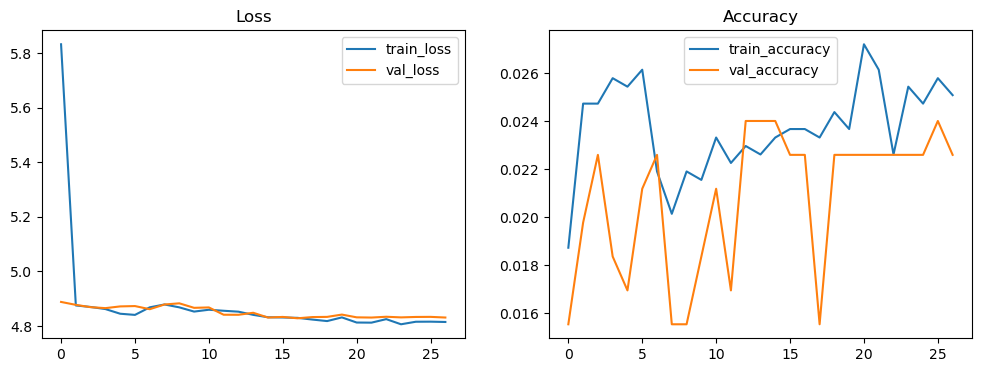

In [6]:
# 绘制训练曲线
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

# 绘制混淆矩阵
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_test, axis=1)

# cm = confusion_matrix(y_true, y_pred_classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

#### Pytorch ####

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
def load_data(data_dir):
    X, y = [], []
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            label = filename.split('_')[0].split('-')[0]
            # match = re.search(r'S(\d+)[_-]', filename)
            # label = int(match.group(1))
            df = pd.read_csv(os.path.join(data_dir, filename))
            if df.shape[1] == 65:  # 确保数据有64个传感器值列加一个时间戳列
                data = df.iloc[:, 1:65].values.reshape(-1, 8, 8, 1)
                X.append(data)
                y.append(label)
    return X, y

data_dir = "/mnt/g/textures/dataset/data processing/csv"
X, y = load_data(data_dir)

# 确保所有样本的时间序列长度一致
max_time_steps = max([x.shape[0] for x in X])
X_padded = []
for x in X:
    padding = np.zeros((max_time_steps - x.shape[0], 8, 8, 1))
    x_padded = np.vstack((x, padding))
    X_padded.append(x_padded)

# 标签编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# 将数据转换为NumPy数组
X_padded = np.array(X_padded)
y = np.array(y)

# 将数据转换为PyTorch张量
X_padded = torch.tensor(X_padded, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# 转换数据形状为 (batch_size, channels, time_steps, height, width)
X_padded = X_padded.permute(0, 4, 1, 2, 3)

In [3]:
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []
min_samples = 10  # 设置最小样本数阈值
for label in np.unique(y):
    X_label = X_padded[y == label]
    y_label = y[y == label]
    if len(y_label) < min_samples:
        print(f"Label {label} has less than {min_samples} samples, removing it.")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2, random_state=42)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# 合并所有标签的数据
X_train = torch.cat(X_train_list)
X_test = torch.cat(X_test_list)
y_train = torch.cat(y_train_list)
y_test = torch.cat(y_test_list)

# # 标签编码
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)
# num_classes = len(label_encoder.classes_)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义Conv3D模型
class Conv3DModel(nn.Module):
    def __init__(self, num_classes):
        super(Conv3DModel, self).__init__()
        self.conv1 = nn.Conv3d(1, 32, kernel_size=(3, 3, 3), padding=1)
        self.bn1 = nn.BatchNorm3d(32)
        self.pool1 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        
        self.conv2 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=1)
        self.bn2 = nn.BatchNorm3d(64)
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        
        self.conv3 = nn.Conv3d(64, 128, kernel_size=(3, 3, 3), padding=1)
        self.bn3 = nn.BatchNorm3d(128)
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        
        self.fc1 = nn.Linear(128 * (max_time_steps // 8) * 1 * 1, 256)  # 修改这里的尺寸以适应数据
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 定义Transformer模型
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, num_layers=3, d_model=128, num_heads=8, dim_feedforward=256, dropout=0.3):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_time_steps, d_model))
        encoder_layer = nn.TransformerEncoderLayer(d_model, num_heads, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        # x shape: (batch_size, channels, time_steps, height, width)
        batch_size, channels, time_steps, h, w = x.shape
        x = x.view(batch_size, time_steps, -1)  # Reshape to (batch_size, time_steps, input_dim)
        x = self.embedding(x) + self.positional_encoding[:, :time_steps, :]
        x = self.transformer_encoder(x.permute(1, 0, 2))  # Transformer expects input shape (time_steps, batch_size, d_model)
        x = x.mean(dim=0)  # Average over time dimension
        x = self.fc(x)
        return x

input_dim = 64  # 8*8
conv_model = Conv3DModel(num_classes)
transformer_model = TransformerModel(input_dim, num_classes)

# 配置训练参数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv_model = conv_model.to(device)
transformer_model = transformer_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.Adam(conv_model.parameters(), lr=0.001)
optimizer_transformer = optim.Adam(transformer_model.parameters(), lr=0.0001)

Label 22 has less than 10 samples, removing it.


/home/admins/miniconda3/envs/myenv/lib/python3.9/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [4]:
num_epochs = 150
train_losses_conv = []
test_losses_conv = []
best_val_loss = float('inf')
patience, trials = 20, 0
for epoch in range(num_epochs):
    conv_model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer_conv.zero_grad()
        outputs = conv_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer_conv.step()
        running_loss += loss.item()
    train_losses_conv.append(running_loss / len(train_loader))
    
    conv_model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = conv_model(X_batch)
            loss = criterion(outputs, y_batch)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
    test_losses_conv.append(test_loss / len(test_loader))
    accuracy = correct / len(test_dataset)
    print(f'Conv3D Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses_conv[-1]:.4f}, Test Loss: {test_losses_conv[-1]:.4f}, Accuracy: {accuracy:.4f}')
    
    if test_loss < best_val_loss:
        best_val_loss = test_loss
        trials = 0
    else:
        trials += 1
    if trials >= patience:
        print('Early stopping')
        break

Conv3D Epoch 1/150, Train Loss: 4.8240, Test Loss: 4.6123, Accuracy: 0.0494
Conv3D Epoch 2/150, Train Loss: 4.5352, Test Loss: 4.3661, Accuracy: 0.0777
Conv3D Epoch 3/150, Train Loss: 4.2970, Test Loss: 4.0173, Accuracy: 0.1003
Conv3D Epoch 4/150, Train Loss: 3.9590, Test Loss: 3.6124, Accuracy: 0.1681
Conv3D Epoch 5/150, Train Loss: 3.6786, Test Loss: 3.2637, Accuracy: 0.2218
Conv3D Epoch 6/150, Train Loss: 3.4873, Test Loss: 2.9852, Accuracy: 0.2020
Conv3D Epoch 7/150, Train Loss: 3.3101, Test Loss: 2.8059, Accuracy: 0.2881
Conv3D Epoch 8/150, Train Loss: 3.1759, Test Loss: 2.5851, Accuracy: 0.3192
Conv3D Epoch 9/150, Train Loss: 2.9706, Test Loss: 2.4757, Accuracy: 0.2853
Conv3D Epoch 10/150, Train Loss: 2.8401, Test Loss: 2.2567, Accuracy: 0.3884
Conv3D Epoch 11/150, Train Loss: 2.7476, Test Loss: 2.2469, Accuracy: 0.3545
Conv3D Epoch 12/150, Train Loss: 2.6598, Test Loss: 2.0748, Accuracy: 0.4068
Conv3D Epoch 13/150, Train Loss: 2.6036, Test Loss: 2.1229, Accuracy: 0.3785
Conv3D E

In [5]:
num_epochs = 100
train_losses_transformer = []
test_losses_transformer = []
best_val_loss = float('inf')
patience, trials = 20, 0
for epoch in range(num_epochs):
    transformer_model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer_transformer.zero_grad()
        outputs = transformer_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(transformer_model.parameters(), max_norm=1.0)
        optimizer_transformer.step()
        running_loss += loss.item()
    train_losses_transformer.append(running_loss / len(train_loader))
    
    transformer_model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = transformer_model(X_batch)
            loss = criterion(outputs, y_batch)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
    test_losses_transformer.append(test_loss / len(test_loader))
    accuracy = correct / len(test_dataset)
    print(f'Transformer Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses_transformer[-1]:.4f}, Test Loss: {test_losses_transformer[-1]:.4f}, Accuracy: {accuracy:.4f}')

    if test_loss < best_val_loss:
        best_val_loss = test_loss
        trials = 0
    else:
        trials += 1
    if trials >= patience:
        print('Early stopping')
        break

Transformer Epoch 1/100, Train Loss: 4.8707, Test Loss: 4.6981, Accuracy: 0.0424
Transformer Epoch 2/100, Train Loss: 4.5791, Test Loss: 4.3965, Accuracy: 0.0876
Transformer Epoch 3/100, Train Loss: 4.3003, Test Loss: 4.1311, Accuracy: 0.1088
Transformer Epoch 4/100, Train Loss: 4.0634, Test Loss: 3.9152, Accuracy: 0.1342
Transformer Epoch 5/100, Train Loss: 3.8534, Test Loss: 3.7176, Accuracy: 0.1695
Transformer Epoch 6/100, Train Loss: 3.6748, Test Loss: 3.5590, Accuracy: 0.2048
Transformer Epoch 7/100, Train Loss: 3.5126, Test Loss: 3.4231, Accuracy: 0.2034
Transformer Epoch 8/100, Train Loss: 3.3674, Test Loss: 3.3065, Accuracy: 0.2359
Transformer Epoch 9/100, Train Loss: 3.2341, Test Loss: 3.1887, Accuracy: 0.2472
Transformer Epoch 10/100, Train Loss: 3.1129, Test Loss: 3.1007, Accuracy: 0.2825
Transformer Epoch 11/100, Train Loss: 3.0045, Test Loss: 2.9995, Accuracy: 0.2853
Transformer Epoch 12/100, Train Loss: 2.9059, Test Loss: 2.9321, Accuracy: 0.3037
Transformer Epoch 13/100,

In [7]:
# 保存模型
model_path1 = 'conv3d_model.pth'
torch.save(conv_model.state_dict(), model_path1)
print(f'Model saved to {model_path1}')

# 保存模型
model_path2 = 'transformer_model.pth'
torch.save(transformer_model.state_dict(), model_path2)
print(f'Model saved to {model_path2}')

Model saved to conv3d_model.pth
Model saved to transformer_model.pth


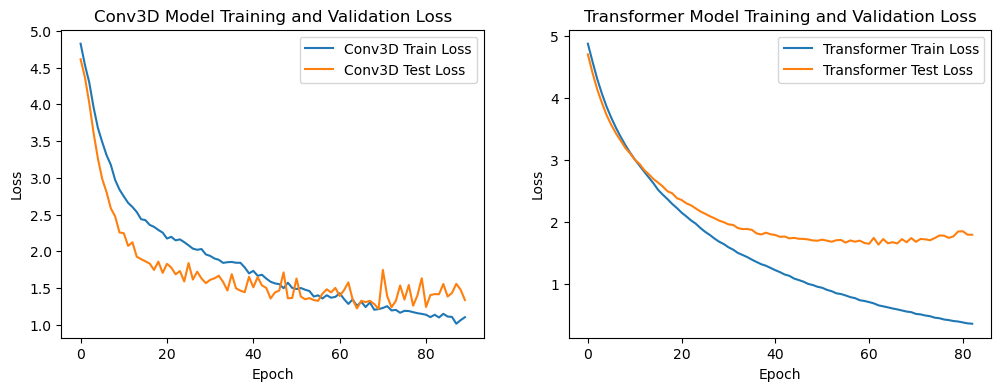

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses_conv, label='Conv3D Train Loss')
plt.plot(test_losses_conv, label='Conv3D Test Loss')
plt.title('Conv3D Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses_transformer, label='Transformer Train Loss')
plt.plot(test_losses_transformer, label='Transformer Test Loss')
plt.title('Transformer Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/tmp/ipykernel_238043/1024498353.py:32: RuntimeWarning: invalid value encountered in divide
  cm_conv_normalized = cm_conv.astype('float') / cm_conv.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_238043/1024498353.py:33: RuntimeWarning: invalid value encountered in divide
  cm_transformer_normalized = cm_transformer.astype('float') / cm_transformer.sum(axis=1)[:, np.newaxis]


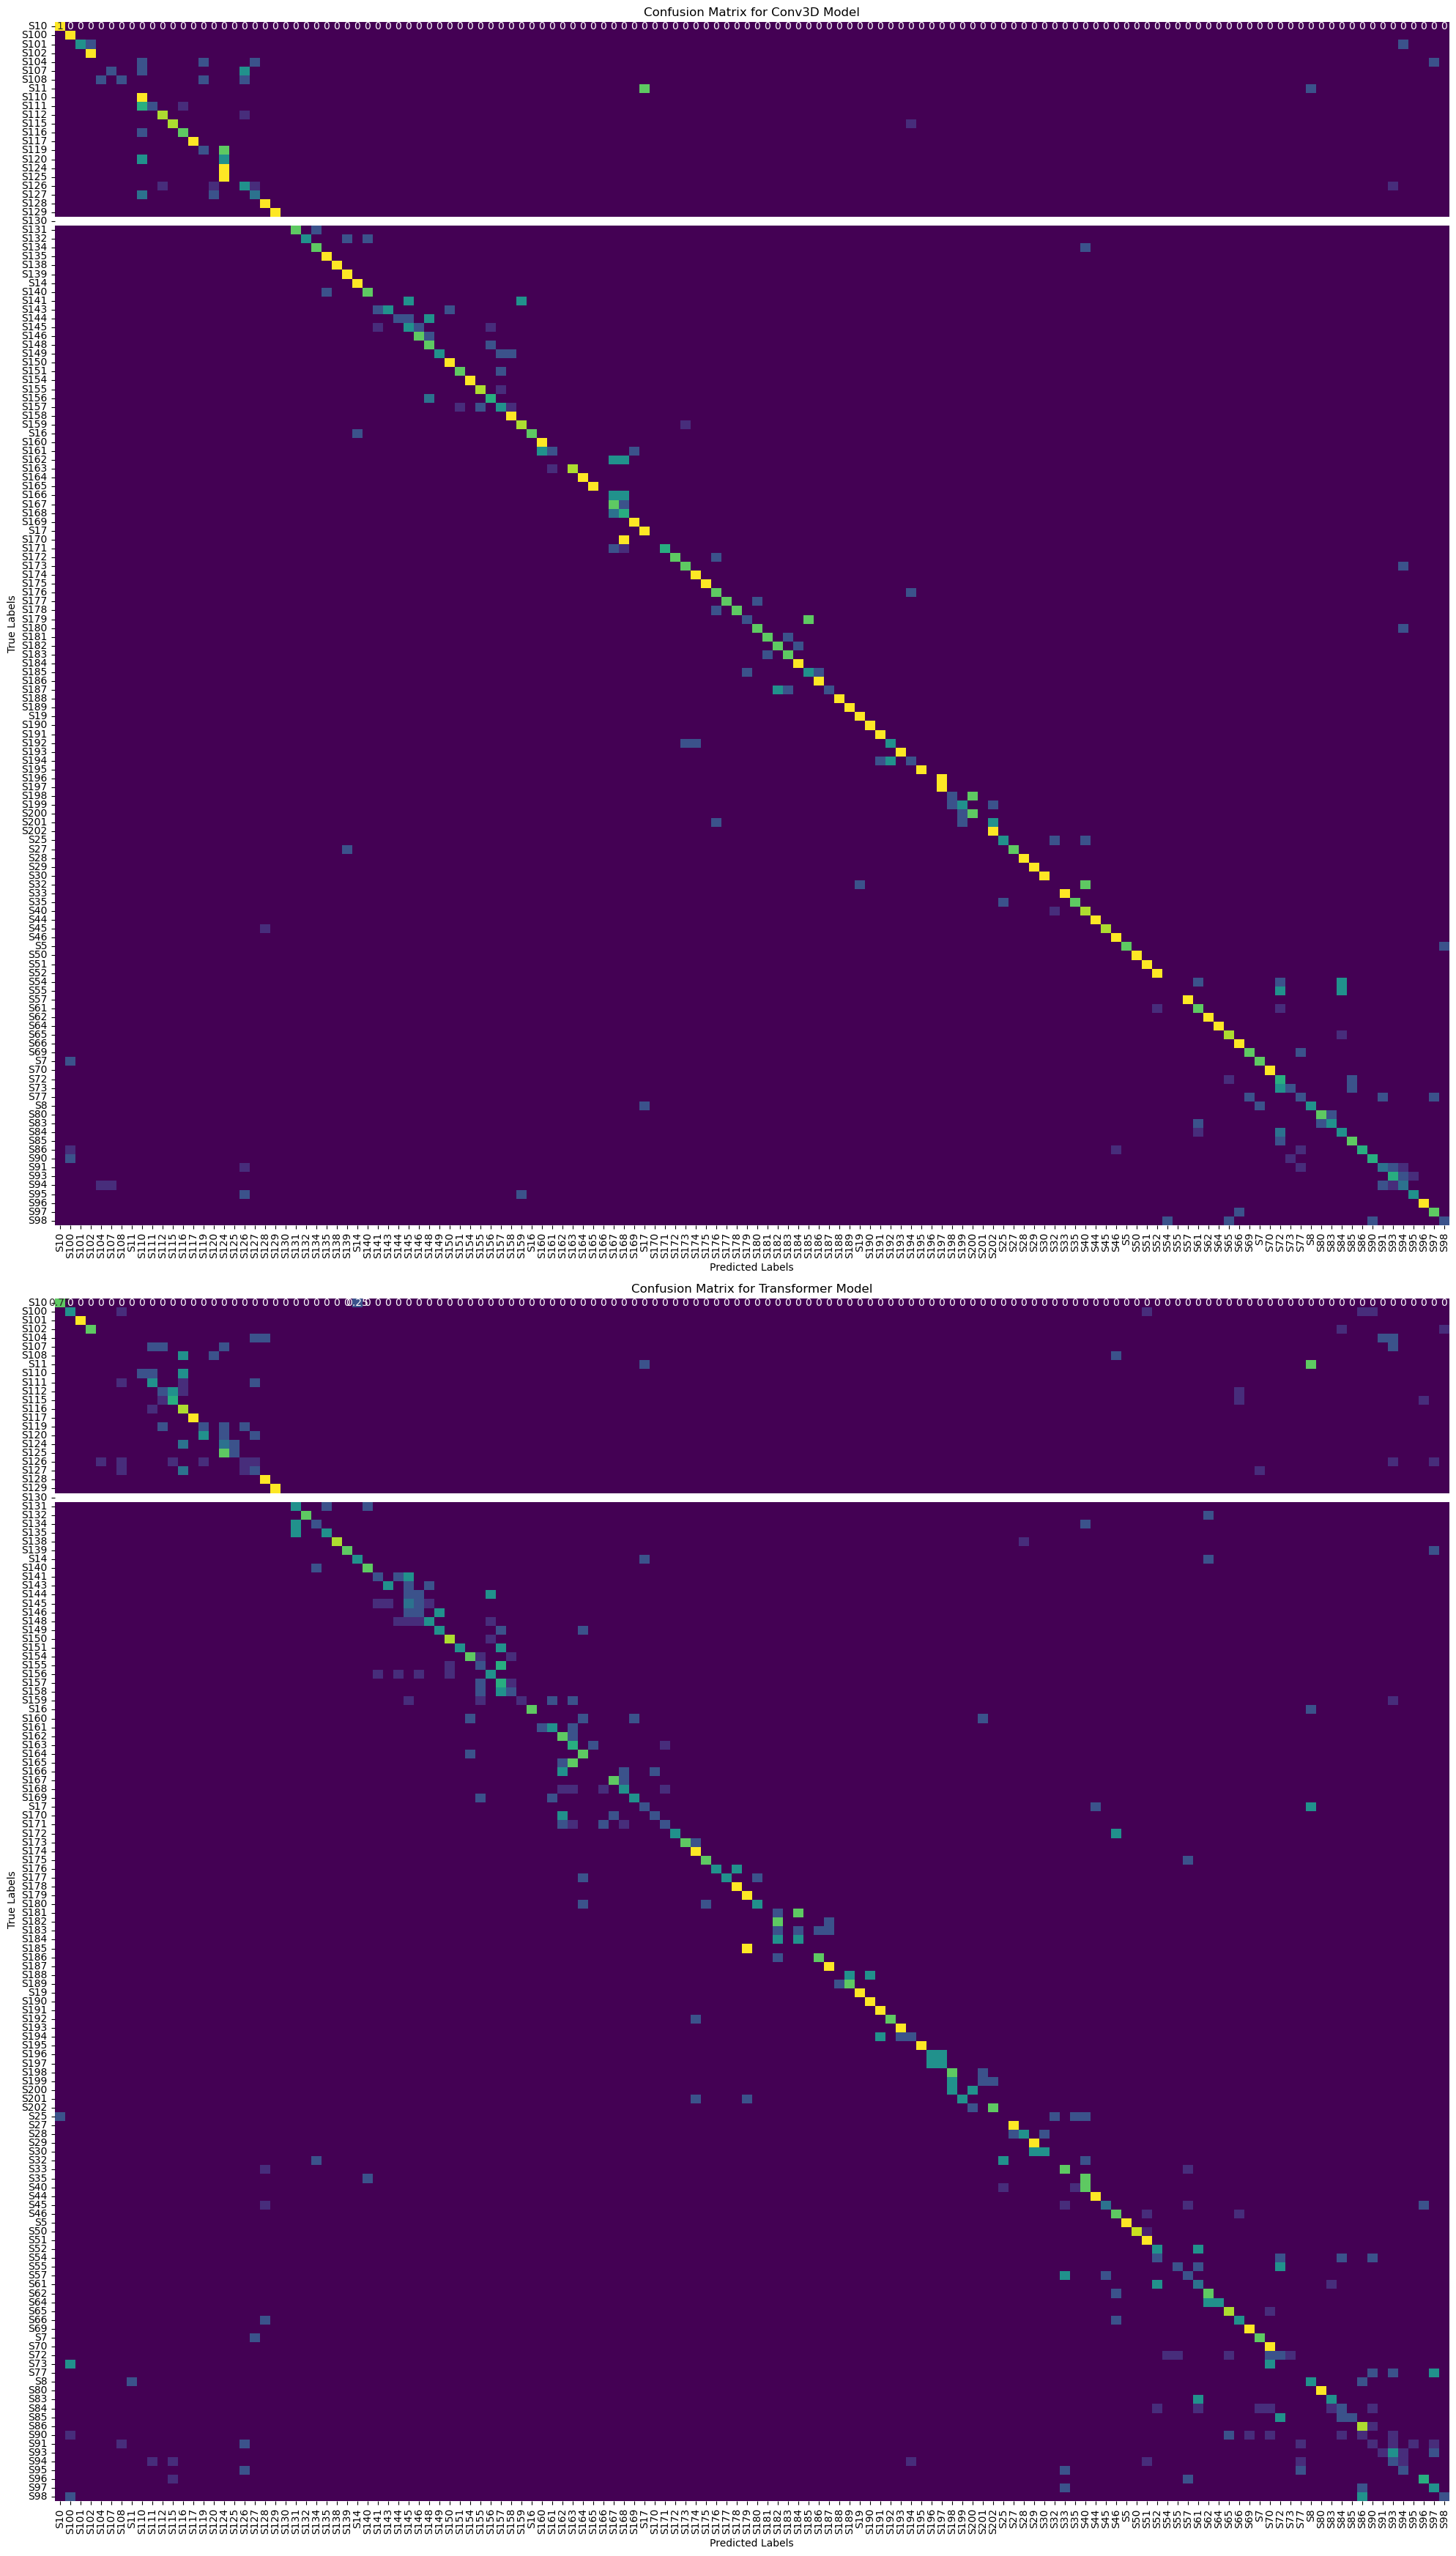

In [8]:
conv_model.eval()
y_true_conv, y_pred_conv = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = conv_model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_true_conv.extend(y_batch.cpu().numpy())
        y_pred_conv.extend(predicted.cpu().numpy())
# 将预测的标签解码回原始标签
y_true_conv = label_encoder.inverse_transform(y_true_conv)
y_pred_conv = label_encoder.inverse_transform(y_pred_conv)

transformer_model.eval()
y_true_transformer, y_pred_transformer = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = transformer_model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_true_transformer.extend(y_batch.cpu().numpy())
        y_pred_transformer.extend(predicted.cpu().numpy())
# 将预测的标签解码回原始标签
y_true_transformer = label_encoder.inverse_transform(y_true_transformer)
y_pred_transformer = label_encoder.inverse_transform(y_pred_transformer)

# 计算混淆矩阵
cm_conv = confusion_matrix(y_true_conv, y_pred_conv, labels=label_encoder.classes_)
cm_transformer = confusion_matrix(y_true_transformer, y_pred_transformer, labels=label_encoder.classes_)

# 归一化混淆矩阵
cm_conv_normalized = cm_conv.astype('float') / cm_conv.sum(axis=1)[:, np.newaxis]
cm_transformer_normalized = cm_transformer.astype('float') / cm_transformer.sum(axis=1)[:, np.newaxis]

# 绘制混淆矩阵
fig, ax = plt.subplots(2, 1, figsize=(20, 35))

sns.heatmap(cm_conv_normalized, annot=True, ax=ax[0], cmap='viridis', cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax[0].set_title('Confusion Matrix for Conv3D Model')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(cm_transformer_normalized, annot=True, ax=ax[1], cmap='viridis', cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax[1].set_title('Confusion Matrix for Transformer Model')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

/tmp/ipykernel_238043/21874290.py:2: RuntimeWarning: invalid value encountered in divide
  accuracy_per_class = cm.diagonal() / cm.sum(axis=1)


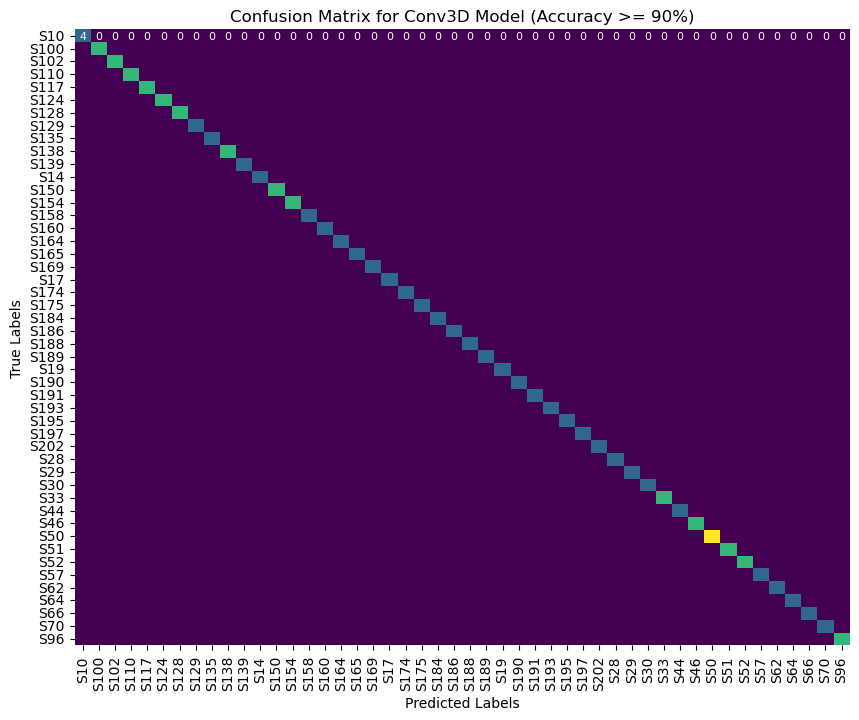

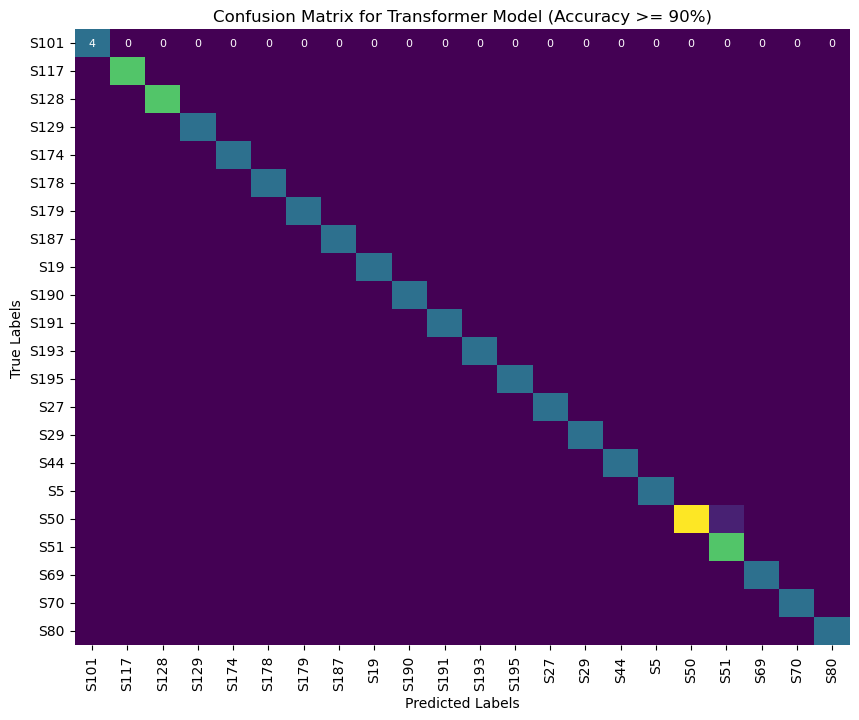

In [9]:
def compute_accuracy_per_class(cm):
    accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
    return accuracy_per_class

# 过滤准确率高于90%的类别
def filter_classes(cm, accuracy_threshold=0.9):
    accuracy_per_class = compute_accuracy_per_class(cm)
    selected_classes = np.where(accuracy_per_class >= accuracy_threshold)[0]
    return selected_classes

# 绘制混淆矩阵
def plot_confusion_matrix(cm, selected_classes, title):
    cm_filtered = cm[selected_classes][:, selected_classes]
    # cm_normalized = cm_filtered.astype('float') / cm_filtered.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_filtered, annot=True, cmap='viridis', cbar=False, annot_kws={"size": 8, "color": "white"},
                xticklabels=label_encoder.inverse_transform(selected_classes), yticklabels=label_encoder.inverse_transform(selected_classes))
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm_filtered, display_labels=selected_classes_transformer)
    # fig, ax = plt.subplots(figsize=(20, 16))
    # disp.plot(ax=ax)
    # plt.xlabel('Predicted Labels')
    # plt.ylabel('True Labels')
    # plt.xticks(rotation=90)
    # plt.title(title)
    # plt.show()

# # 计算混淆矩阵
# conv_model.eval()
# y_true_conv, y_pred_conv = [], []
# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         outputs = conv_model(X_batch)
#         _, predicted = torch.max(outputs, 1)
#         y_true_conv.extend(y_batch.cpu().numpy())
#         y_pred_conv.extend(predicted.cpu().numpy())
# y_true_conv = label_encoder.inverse_transform(y_true_conv)
# y_pred_conv = label_encoder.inverse_transform(y_pred_conv)

# transformer_model.eval()
# y_true_transformer, y_pred_transformer = [], []
# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         outputs = transformer_model(X_batch)
#         _, predicted = torch.max(outputs, 1)
#         y_true_transformer.extend(y_batch.cpu().numpy())
#         y_pred_transformer.extend(predicted.cpu().numpy())
# y_true_transformer = label_encoder.inverse_transform(y_true_transformer)
# y_pred_transformer = label_encoder.inverse_transform(y_pred_transformer)
# # 计算混淆矩阵
# cm_conv = confusion_matrix(y_true_conv, y_pred_conv, labels=label_encoder.classes_)
# cm_transformer = confusion_matrix(y_true_transformer, y_pred_transformer, labels=label_encoder.classes_)

# 过滤准确率高于90%的类别
selected_classes_conv = filter_classes(cm_conv, 0.9)
selected_classes_transformer = filter_classes(cm_transformer, 0.9)

# 绘制混淆矩阵
plot_confusion_matrix(cm_conv, selected_classes_conv, 'Confusion Matrix for Conv3D Model (Accuracy >= 90%)')
plot_confusion_matrix(cm_transformer, selected_classes_transformer, 'Confusion Matrix for Transformer Model (Accuracy >= 90%)')

/tmp/ipykernel_485228/3358576480.py:2: RuntimeWarning: invalid value encountered in divide
  accuracy_per_class = cm.diagonal() / cm.sum(axis=1)


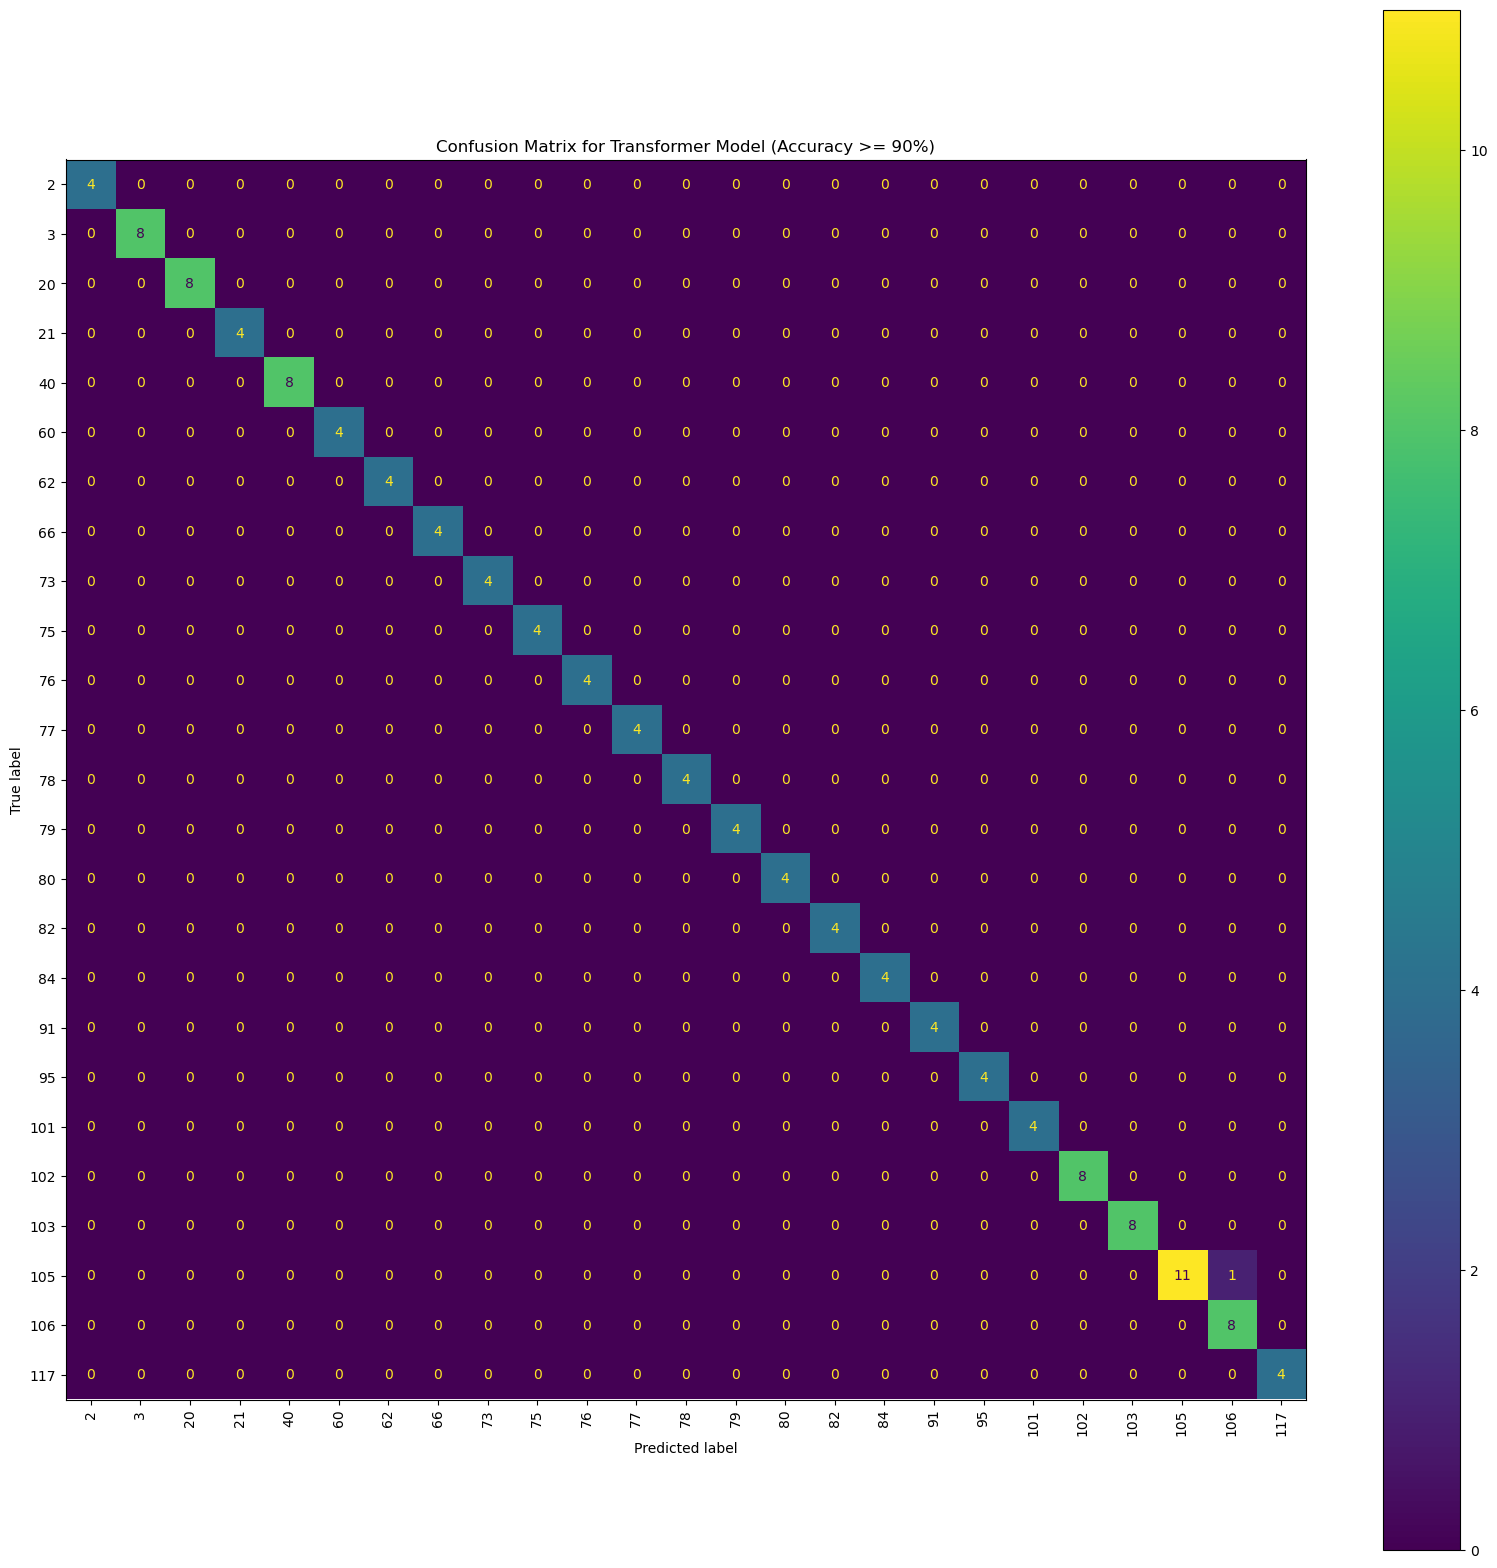

In [35]:
transformer_model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = transformer_model(X_batch)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

cm = confusion_matrix(y_true, y_pred_transformer, labels=range(num_classes))
cm_filtered = cm[selected_classes_transformer][:, selected_classes_transformer]
selected_classes_transformer = filter_classes(cm, 0.9)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_filtered, display_labels=selected_classes_transformer)
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix for Transformer Model (Accuracy >= 90%)')
plt.show()

/tmp/ipykernel_205190/3899128471.py:2: RuntimeWarning: invalid value encountered in divide
  accuracy_per_class = cm.diagonal() / cm.sum(axis=1)


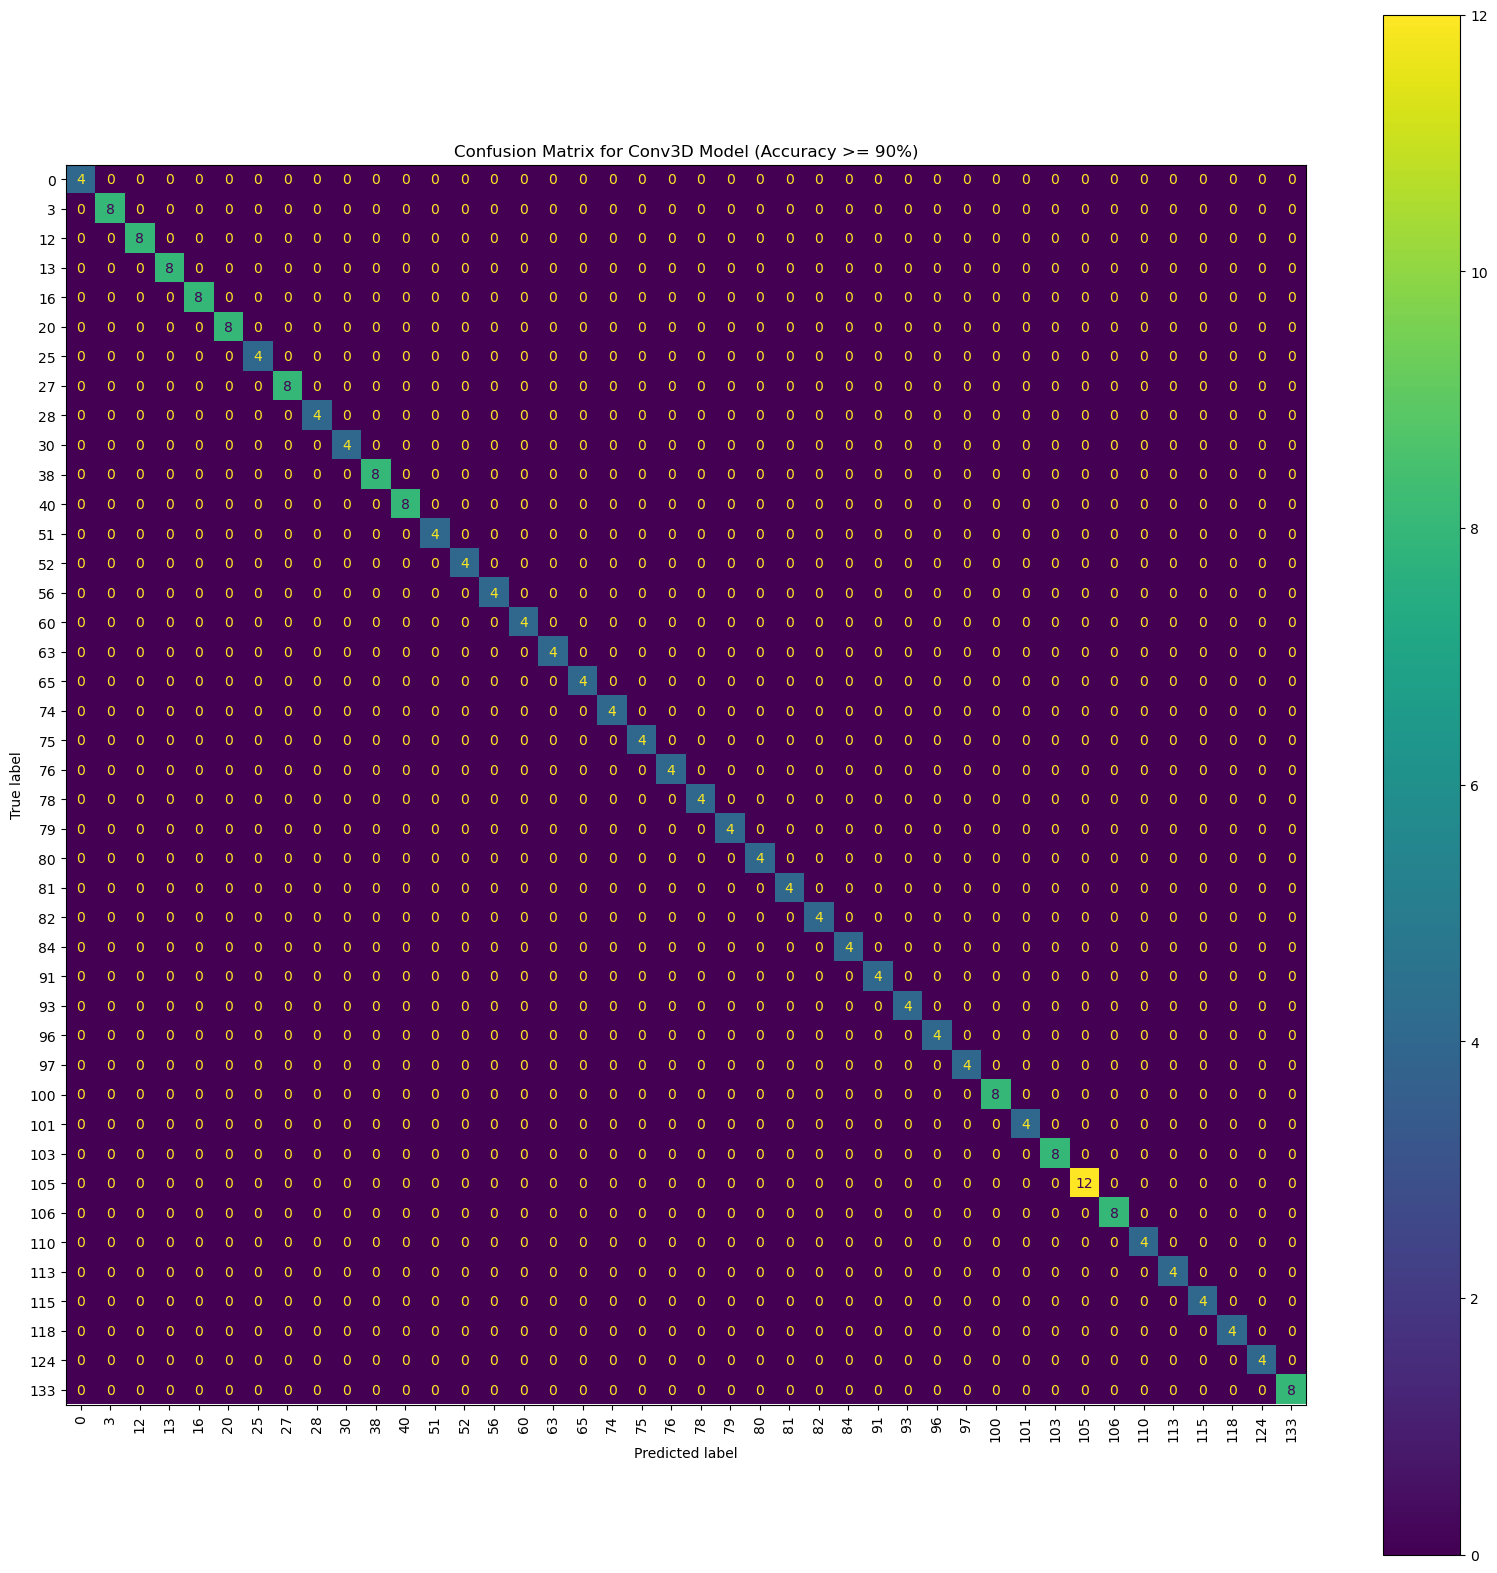

In [8]:
conv_model.eval()
y_true, y_pred_conv = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = conv_model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred_conv.extend(predicted.cpu().numpy())
        
cm = confusion_matrix(y_true, y_pred_conv, labels=range(num_classes))
cm_filtered = cm[selected_classes_conv][:, selected_classes_conv]
selected_classes_conv = filter_classes(cm, 0.9)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_filtered, display_labels=selected_classes_conv)
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix for Conv3D Model (Accuracy >= 90%)')
plt.show()

2024-07-08 15:30:47.039364: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 15:30:50.442827: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_485228/3358576480.py:2: RuntimeWarning: invalid value encountered in divide
  accuracy_per_class = cm.diagonal() / cm.sum(axis=1)


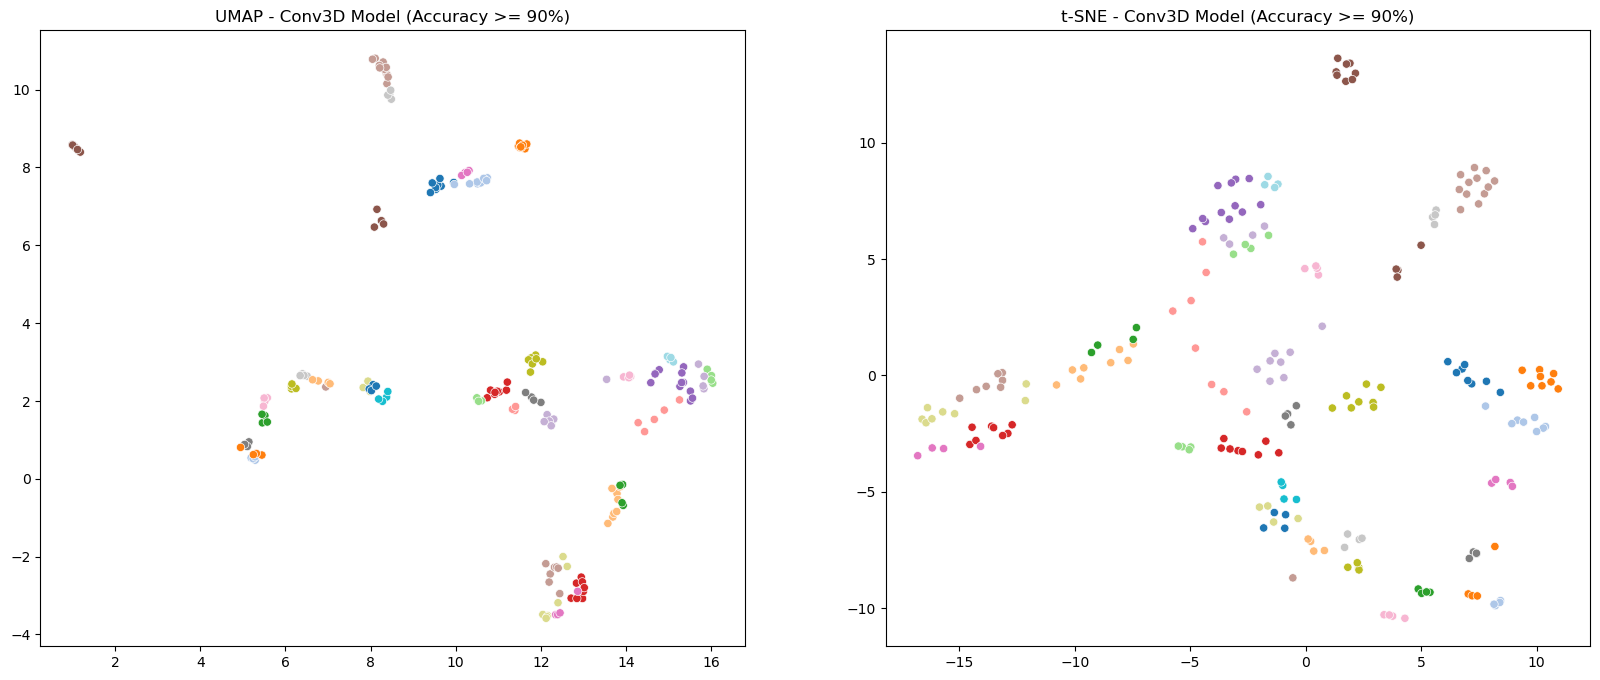

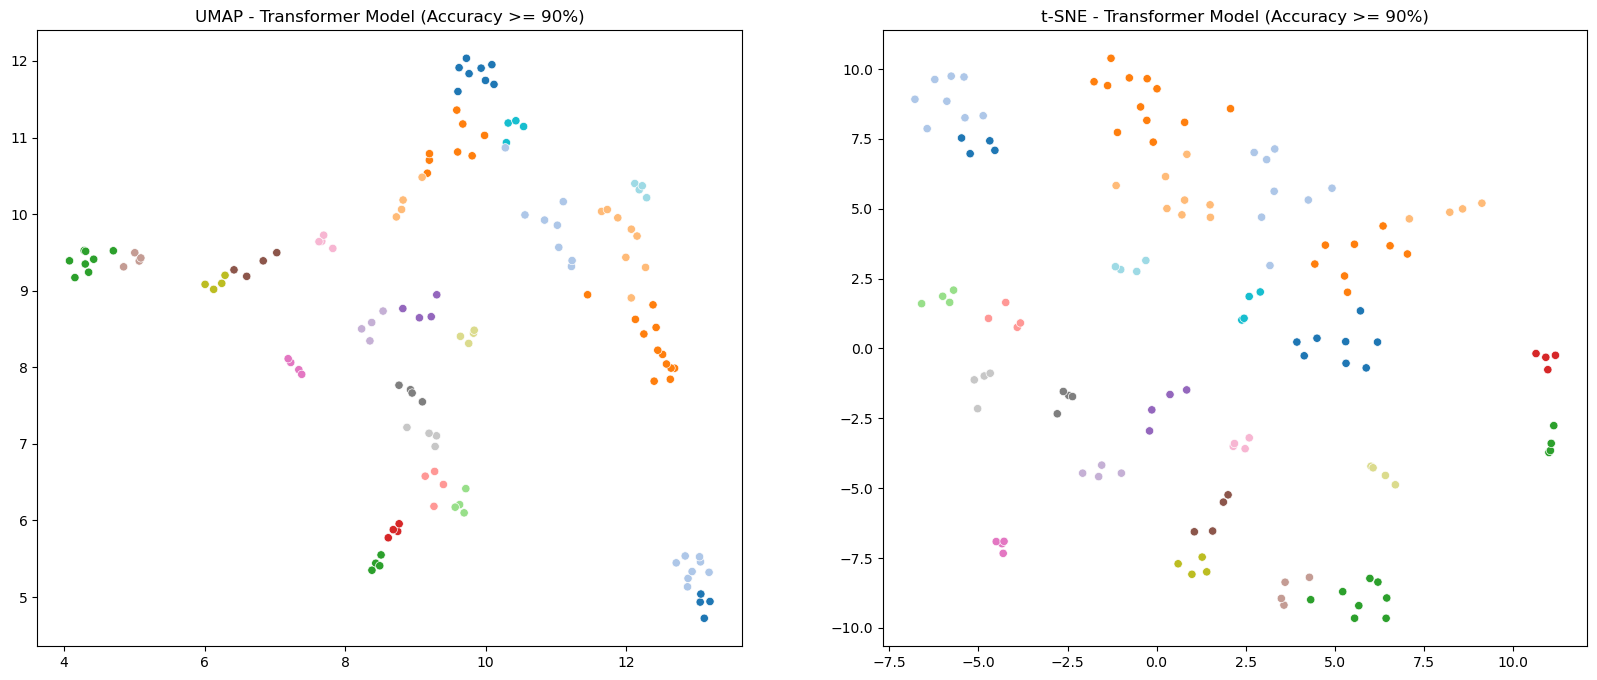

In [38]:
from sklearn.manifold import TSNE
import umap

def extract_features(model, data_loader, device):
    model.eval()
    features, labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            features.append(outputs.cpu().numpy())
            labels.append(y_batch.cpu().numpy())
    return np.concatenate(features), np.concatenate(labels)

# 过滤高准确率类别的数据
def filter_high_accuracy_data(features, labels, selected_classes):
    mask = np.isin(labels, selected_classes)
    return features[mask], labels[mask]

# 绘制UMAP和t-SNE图
def plot_umap_tsne(features, labels, title):
    reducer_umap = umap.UMAP()
    embedding_umap = reducer_umap.fit_transform(features)
    
    tsne = TSNE(n_components=2)
    embedding_tsne = tsne.fit_transform(features)
    
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=embedding_umap[:, 0], y=embedding_umap[:, 1], hue=labels, palette='tab20', legend=False)
    plt.title(f'UMAP - {title}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=embedding_tsne[:, 0], y=embedding_tsne[:, 1], hue=labels, palette='tab20', legend=False)
    plt.title(f't-SNE - {title}')
    
    plt.show()

# 提取Conv3D模型的特征表示
conv_features, conv_labels = extract_features(conv_model, test_loader, device)
selected_classes_conv = filter_classes(cm_conv, 0.9)
conv_features_filtered, conv_labels_filtered = filter_high_accuracy_data(conv_features, conv_labels, selected_classes_conv)

# 提取Transformer模型的特征表示
transformer_features, transformer_labels = extract_features(transformer_model, test_loader, device)
selected_classes_transformer = filter_classes(cm_transformer, 0.9)
transformer_features_filtered, transformer_labels_filtered = filter_high_accuracy_data(transformer_features, transformer_labels, selected_classes_transformer)

# 绘制UMAP和t-SNE图
plot_umap_tsne(conv_features_filtered, conv_labels_filtered, 'Conv3D Model (Accuracy >= 90%)')
plot_umap_tsne(transformer_features_filtered, transformer_labels_filtered, 'Transformer Model (Accuracy >= 90%)')

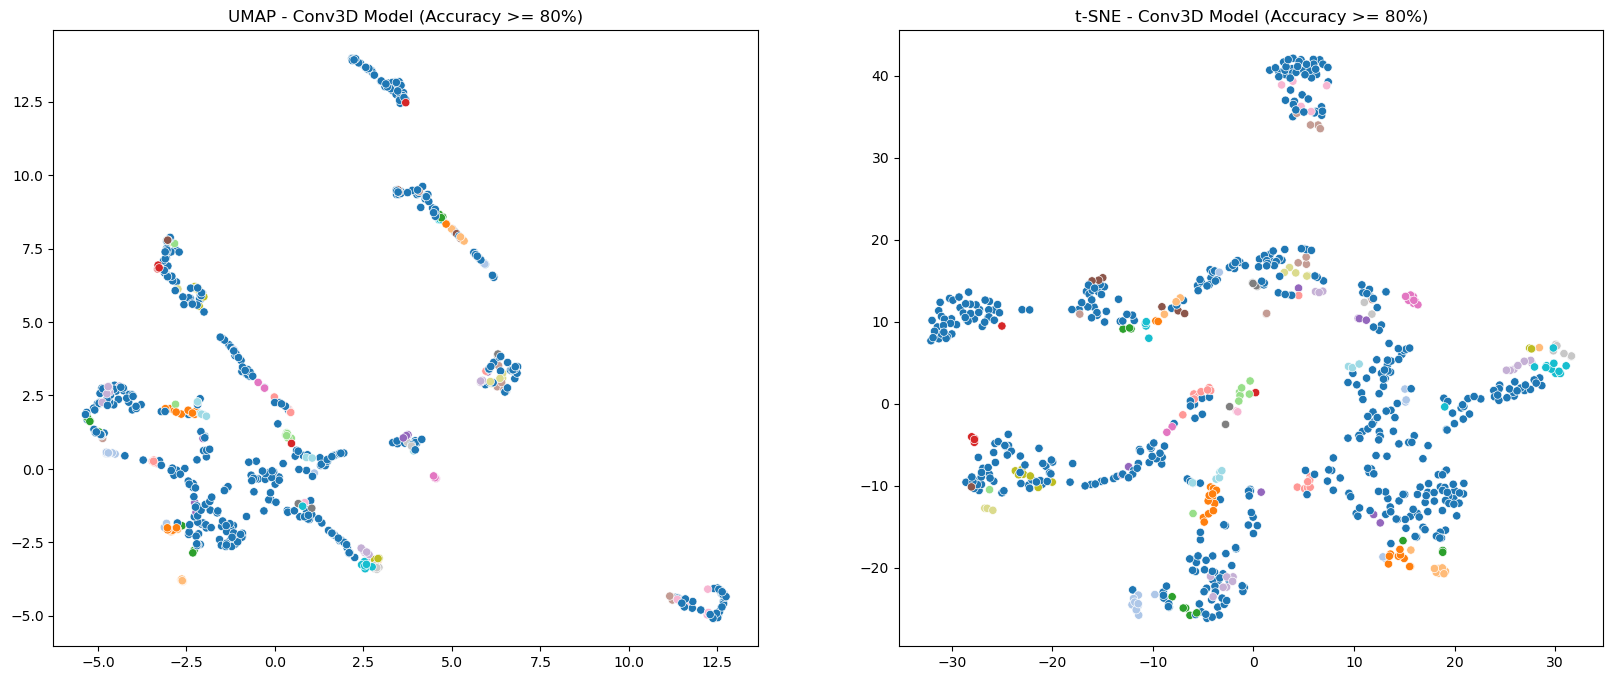

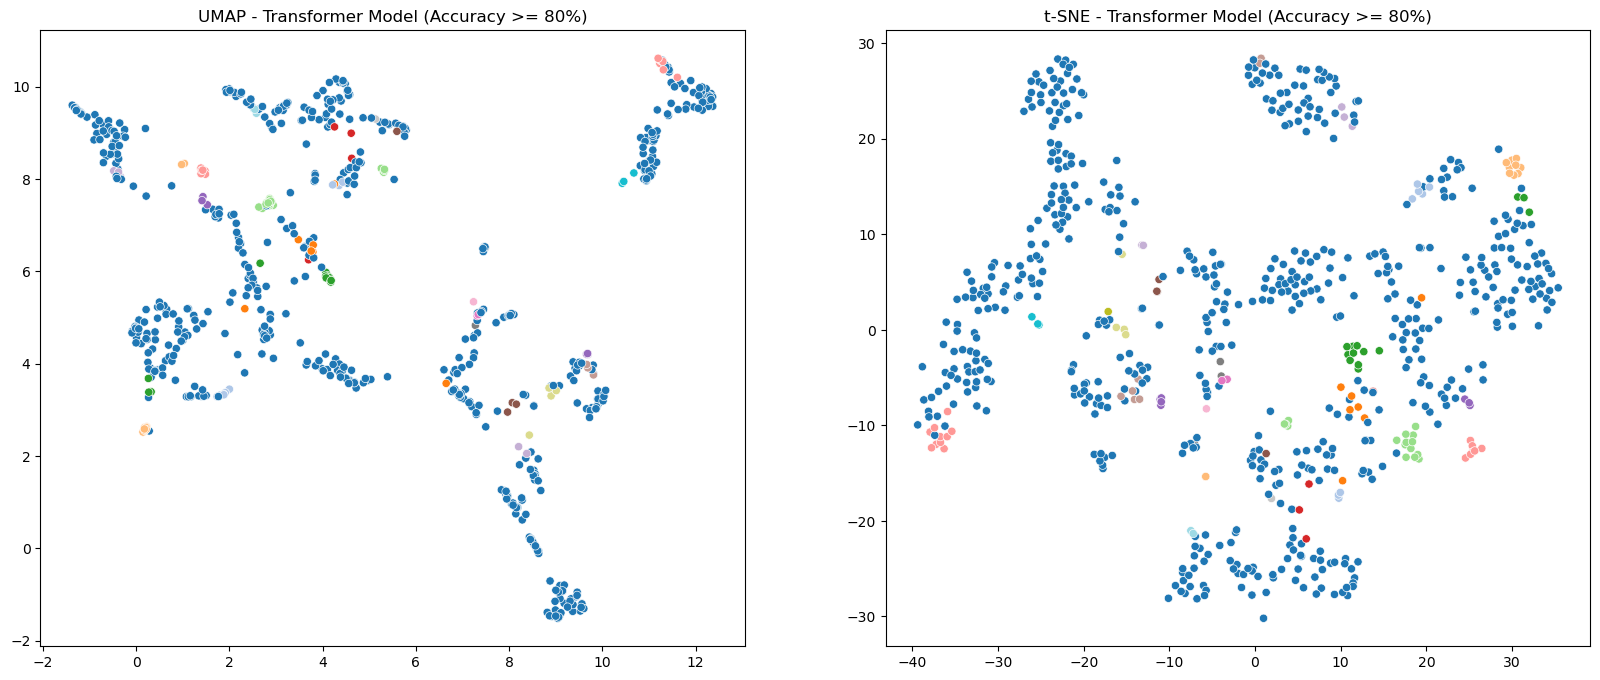

In [15]:
def extract_features(model, data_loader, device):
    model.eval()
    features, labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            features.append(outputs.cpu().numpy())
            labels.append(y_batch.cpu().numpy())
    return np.concatenate(features), np.concatenate(labels)

# 过滤高准确率类别的数据
def filter_high_accuracy_data(features, labels, selected_classes):
    mask = np.isin(labels, selected_classes)
    filtered_labels = np.where(mask, labels, -1)  # 使用-1表示其他类别
    return features, filtered_labels

# 绘制UMAP和t-SNE图
def plot_umap_tsne(features, labels, title):
    reducer_umap = umap.UMAP()
    embedding_umap = reducer_umap.fit_transform(features)
    
    tsne = TSNE(n_components=2)
    embedding_tsne = tsne.fit_transform(features)
    
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=embedding_umap[:, 0], y=embedding_umap[:, 1], hue=labels, palette='tab20', legend=False)
    plt.title(f'UMAP - {title}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=embedding_tsne[:, 0], y=embedding_tsne[:, 1], hue=labels, palette='tab20', legend=False)
    plt.title(f't-SNE - {title}')
    
    plt.show()

# 提取Conv3D模型的特征表示
conv_features, conv_labels = extract_features(conv_model, test_loader, device)
selected_classes_conv = filter_classes(cm_conv, 0.9)
conv_features_filtered, conv_labels_filtered = filter_high_accuracy_data(conv_features, conv_labels, selected_classes_conv)

# 提取Transformer模型的特征表示
transformer_features, transformer_labels = extract_features(transformer_model, test_loader, device)
selected_classes_transformer = filter_classes(cm_transformer, 0.9)
transformer_features_filtered, transformer_labels_filtered = filter_high_accuracy_data(transformer_features, transformer_labels, selected_classes_transformer)

# 绘制UMAP和t-SNE图
plot_umap_tsne(conv_features_filtered, conv_labels_filtered, 'Conv3D Model (Accuracy >= 80%)')
plot_umap_tsne(transformer_features_filtered, transformer_labels_filtered, 'Transformer Model (Accuracy >= 80%)')

## LLM ##

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def load_data(data_dir):
    X, y = [], []
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            label = filename.split('_')[0].split('-')[0]
            # match = re.search(r'S(\d+)[_-]', filename)
            # label = int(match.group(1))
            df = pd.read_csv(os.path.join(data_dir, filename))
            if df.shape[1] == 65:  # 确保数据有64个传感器值列加一个时间戳列
                data = df.iloc[:, 1:65].values.reshape(-1, 8, 8, 1)
                X.append(data)
                y.append(label)
    return X, y

data_dir = "/mnt/g/textures/dataset/data processing/csv"
X, y = load_data(data_dir)

# 确保所有样本的时间序列长度一致
max_time_steps = max([x.shape[0] for x in X])
X_padded = []
for x in X:
    padding = np.zeros((max_time_steps - x.shape[0], 8, 8, 1))
    x_padded = np.vstack((x, padding))
    X_padded.append(x_padded)

# 标签编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# 将数据转换为NumPy数组
X_padded = np.array(X_padded)
y = np.array(y)

# 将数据转换为PyTorch张量
X_padded = torch.tensor(X_padded, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# 转换数据形状为 (batch_size, channels, time_steps, height, width)
X_padded = X_padded.permute(0, 4, 1, 2, 3)

X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []
min_samples = 10  # 设置最小样本数阈值
for label in np.unique(y):
    X_label = X_padded[y == label]
    y_label = y[y == label]
    if len(y_label) < min_samples:
        print(f"Label {label} has less than {min_samples} samples, removing it.")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2, random_state=42)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# 合并所有标签的数据
X_train = torch.cat(X_train_list)
X_test = torch.cat(X_test_list)
y_train = torch.cat(y_train_list)
y_test = torch.cat(y_test_list)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义Conv3D模型
class Conv3DModel(nn.Module):
    def __init__(self, num_classes):
        super(Conv3DModel, self).__init__()
        self.conv1 = nn.Conv3d(1, 32, kernel_size=(3, 3, 3), padding=1)
        self.bn1 = nn.BatchNorm3d(32)
        self.pool1 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        
        self.conv2 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=1)
        self.bn2 = nn.BatchNorm3d(64)
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        
        self.conv3 = nn.Conv3d(64, 128, kernel_size=(3, 3, 3), padding=1)
        self.bn3 = nn.BatchNorm3d(128)
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2))
        
        self.fc1 = nn.Linear(128 * (max_time_steps // 8) * 1 * 1, 256)  # 修改这里的尺寸以适应数据
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 加载已保存的Conv3D模型
conv_model = Conv3DModel(num_classes=len(np.unique(y)))
conv_model.load_state_dict(torch.load('conv3d_model.pth'))
conv_model.to(device)
conv_model.eval()

# 预测并解码标签
y_true, y_pred = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = conv_model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# 将预测的标签解码回原始标签
y_true_conv = label_encoder.inverse_transform(y_true)
y_pred_conv = label_encoder.inverse_transform(y_pred)

Label 22 has less than 10 samples, removing it.


In [3]:
df = pd.read_excel('dataset_descriptionEN.xlsx', usecols=['Unnamed: 0', 'Unnamed: 2'])
df.columns = df.iloc[0]
df = df[1:]
df.columns = ['Sample Number', 'Name']
df['Sample Number'] = df['Sample Number'].apply(lambda x: f"S{x.strip()[:-1]}")
df['Sample Number'] = df['Sample Number'].str.replace(' ', '')
print(df.head())

  Sample Number                 Name
1            S5   40 shuttle organza
2            S7         100D Chiffon
3            S8       Silver Threads
4           S10    75D Pearl Chiffon
5           S11   Matte Flower Crepe


In [4]:
fabric_dict = pd.Series(df['Name'].values, index=df['Sample Number']).to_dict()
# 根据布料编号查找布料名字
def get_fabric_name(label):
    return fabric_dict.get(label, "Unknown Fabric")
# 使用GPT-2生成触感描述
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)

def generate_fabric_description(fabric_name):
    prompt = f"Detailed describe and rate the touch of '{fabric_name}' in terms of six dimensions: softness, roughness, smoothness, elasticity, thickness, and temperature."
    inputs = tokenizer.encode(prompt, return_tensors="pt").to(device)
    attention_mask = torch.ones_like(inputs).to(device)

    outputs = gpt_model.generate(
        inputs,
        attention_mask=attention_mask,
        max_length=1024,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )

    description = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return description

output_file = 'fabric_descriptions.txt'
with open(output_file, 'w') as f:
    for label in y_pred_conv[::10]:
        fabric_name = get_fabric_name(label)
        description = generate_fabric_description(fabric_name)
        f.write(f"Fabric: {fabric_name}\n")
        f.write(f"Description: {description}\n\n")
        print(f"Fabric: {fabric_name}")
        print(f"Description: {description}")

print(f"Descriptions saved to {output_file}")

Fabric:  75D Pearl Chiffon
Description: Detailed describe and rate the touch of'75D Pearl Chiffon' in terms of six dimensions: softness, roughness, smoothness, elasticity, thickness, and temperature.

(If the user is familiar with the term'softness', then the hardness of the 'chiffony' is approximately 1.5.'S / 10 = 15.9. The 'pink' hardness is about 1/10. This is a very strong hardness and is very similar to the soft hardness that most people use in their home.)
. See also: Softness
: A rough hardness. A smooth hardness which is slightly soft. An elastic hardness, which can be very hard. (See also softity.) A thick hardness (see softnesses). A flat hardness in the form of a grain. Soft and soft, not soft and flat. Hard and rough, depending on the thickness of each of these. Also called: hardwood hardness
, hardwoods hardness: In the sense that a hard wood is considered a soft wood if it has a hardness above 10, a flat wood, if there is no hardness at all.


A note on softwoods
 (more 

In [ ]:
# CUDA_VISIBLE_DEVICES=1 python template.py
import torch
import os
from transformers import (
    AutoTokenizer, AutoModelForCausalLM, AutoConfig, BitsAndBytesConfig, TextStreamer
)
import warnings
from peft import PeftModel
warnings.filterwarnings("ignore")

# 创建布料编号到布料名字的映射字典
fabric_dict = pd.Series(df['Name'].values, index=df['Sample Number']).to_dict()

# 根据布料编号查找布料名字
def get_fabric_name(label):
    return fabric_dict.get(label, "Unknown Fabric")

def load_model(model_path, lora_path=False, quantization='bf16'):
    # Load the tokenizer & set the device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=False)
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    if quantization == 'int4':
        bnb_config = BitsAndBytesConfig(load_in_4bit=True)
        model = AutoModelForCausalLM.from_pretrained(
            model_path,
            torch_dtype=torch.float16,
            quantization_config=bnb_config,
            low_cpu_mem_usage=True,
            # attn_implementation="flash_attention_2",
        )
    elif quantization == 'int8':
        bnb_config = BitsAndBytesConfig(load_in_8bit=True)
        model = AutoModelForCausalLM.from_pretrained(
            model_path,
            torch_dtype=torch.float16,
            quantization_config=bnb_config,
            low_cpu_mem_usage=True,
            # attn_implementation="flash_attention_2", 
        )

    if quantization == 'bf16':
        model = AutoModelForCausalLM.from_pretrained(
            model_path, torch_dtype=torch.bfloat16
        ).to(device)
        model.config.attn_implementation = "flash_attention_2"

    # 检查模型是否在GPU上
    for param in model.parameters():
        if param.device.type != device.type:
            raise ValueError(f"Model parameter not on {device.type}: {param.device}")

    config = AutoConfig.from_pretrained(model_path)

    if lora_path:
        model = PeftModel.from_pretrained(model, lora_path, torch_dtype=torch.bfloat16)
        model.to(device)  # 再次移动以确保

    return model, tokenizer, device, config

def generate_text(model, tokenizer, device, prompt, args):
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)

    with torch.no_grad():
        output = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            repetition_penalty=1.2,
            pad_token_id=tokenizer.eos_token_id,
            **args,
        )
    
    result = tokenizer.batch_decode(output, skip_special_tokens=True)[0]

    question = result.split("### Response:")[0]
    answer = result.split("### Response:\n")[1]

    return question, answer

def turn_weights_to_consolidated_format(model, tokenizer, model_path):
    if hasattr(model, 'module'):
        # The original model is stored in the `module` attribute
        model = model.module
    else:
        # The model is not wrapped with DataParallel, so use it directly
        model = model
    
    # 1.Save the model in consolidated format & name it "consolidated.00.pth"
    # torch.save(model.state_dict(), 'consolidated.00.pth')
    # 2.Save the tokenizer in consolidated format
    # tokenizer.save_pretrained(model_path, save_format="consolidated")

def instr_prompt(content):
    final_prompt = "[INST] {} [/INST]".format(content)
    return final_prompt

def main():
    # 1. Load the model and tokenizer
    # 设置CUDA设备
    os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
    print(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
    ckpt_folder = "../../ckpts"
    # base_model = "Mistral-7B-Instruct-v0.3"
    # base_model = "gemma-2-9b-it"
    # base_model = "Meta-Llama-3.1-8B-Instruct"
    base_model = "Mistral-Nemo-Instruct-2407"

    # ckpt_folder = "../../../results"
    # base_model = "SusGen_GPT_Mistral_Instruct_v0.3_30k_10epoch_merged"
    model, tokenizer, device, config = load_model(
        model_path=os.path.join(ckpt_folder, base_model),
        # lora_path="../results/SusGen30k-int4-adamw32_Mistral-7B-v0.3/checkpoint-1406",
        quantization='bf16'
    )
    # 2. Set the model to evaluation mode
    model.eval()

    # 3. Define the prompt & generate text
    user_instruction = (
        "Instruction:\nYou are an experienced expert in the field of fabrics and are able to structurally describe and score different aspects of fabric touch."
    )
    question = "Detailed describe and rate the touch of suede in terms of six dimensions: softness, roughness, smoothness, elasticity, thickness, and temperature."
    prompt = f"{user_instruction}\n Question:\n{question}"

    final_prompt = instr_prompt(content=prompt) + "### Response:\n"

    args = {
        # "max_length": 4096,
        "temperature": 0.2,
        "do_sample": True,
        "top_p": 0.9,
        "top_k": 40,
        "max_new_tokens": 1024, 
        "num_return_sequences": 1
    }

    question, answer = generate_text(model, tokenizer, device, final_prompt, args)
    print(f"Question:\n{'-' * 10}\n{question.strip()}\n{'=' * 100}")
    print(f"Answer:\n{'-' * 10}\n{answer.strip()}\n{'=' * 100}")

if __name__ == "__main__":
    main()


## ConvLSTM ##

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [4]:
def load_data(data_dir):
    X, y = [], []
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            label = filename.split('_')[0].split('-')[0]
            df = pd.read_csv(os.path.join(data_dir, filename))
            if df.shape[1] == 65:  # 确保数据有64个传感器值列加一个时间戳列
                data = df.iloc[:, 1:65].values.reshape(-1, 1, 8, 8)
                X.append(data)
                y.append(label)
    return X, y

data_dir = "/mnt/g/textures/dataset/data processing/csv"
X, y = load_data(data_dir)

In [5]:
max_time_steps = max([x.shape[0] for x in X])
X_padded = []
for x in X:
    padding = np.zeros((max_time_steps - x.shape[0], 1, 8, 8))
    x_padded = np.vstack((x, padding))
    X_padded.append(x_padded)

# 标签编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# 将数据转换为NumPy数组
X_padded = np.array(X_padded)
y = np.array(y)

# 将数据转换为PyTorch张量
X_padded = torch.tensor(X_padded, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [6]:
max_time_steps = max([x.shape[0] for x in X])
X_padded = []
for x in X:
    padding = np.zeros((max_time_steps - x.shape[0], 1, 8, 8))
    x_padded = np.vstack((x, padding))
    X_padded.append(x_padded)

# 标签编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# 将数据转换为NumPy数组
X_padded = np.array(X_padded)
y = np.array(y)

# 将数据转换为PyTorch张量
X_padded = torch.tensor(X_padded, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义ConvLSTM模型
class ConvLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        super(ConvLSTMCell, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.padding = kernel_size // 2
        self.bias = bias

        self.conv = nn.Conv2d(
            in_channels=self.input_dim + self.hidden_dim,
            out_channels=4 * self.hidden_dim,
            kernel_size=self.kernel_size,
            padding=self.padding,
            bias=self.bias
        )

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state
        combined = torch.cat([input_tensor, h_cur], dim=1)  # concatenate along channel axis
        combined_conv = self.conv(combined)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)
        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)
        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)
        return h_next, c_next

    def init_hidden(self, batch_size, image_size):
        height, width = image_size
        return (torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
                torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device))

class ConvLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, num_layers, num_classes, batch_first=False, bias=True, return_all_layers=False):
        super(ConvLSTM, self).__init__()
        self._check_kernel_size_consistency(kernel_size)
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.num_layers = num_layers  # Fixing the issue here
        self.batch_first = batch_first
        self.bias = bias
        self.return_all_layers = return_all_layers

        self.cell_list = nn.ModuleList()

        for i in range(0, self.num_layers):
            cur_input_dim = self.input_dim if i == 0 else self.hidden_dim[i - 1]

            self.cell_list.append(ConvLSTMCell(
                input_dim=cur_input_dim,
                hidden_dim=self.hidden_dim[i],
                kernel_size=self.kernel_size,
                bias=self.bias
            ))

        self.fc = nn.Linear(self.hidden_dim[-1] * 8 * 8, num_classes)  # Fixing the input dimension

    def forward(self, input_tensor, hidden_state=None):
        b, _, _, h, w = input_tensor.size()
        if hidden_state is not None:
            raise NotImplementedError
        else:
            hidden_state = self._init_hidden(batch_size=b, image_size=(h, w))

        layer_output_list = []
        last_state_list = []

        seq_len = input_tensor.size(1)
        cur_layer_input = input_tensor

        for layer_idx in range(self.num_layers):
            h, c = hidden_state[layer_idx]
            output_inner = []
            for t in range(seq_len):
                h, c = self.cell_list[layer_idx](
                    input_tensor=cur_layer_input[:, t, :, :, :],
                    cur_state=[h, c]
                )
                output_inner.append(h)
            layer_output = torch.stack(output_inner, dim=1)
            cur_layer_input = layer_output

            layer_output_list.append(layer_output)
            last_state_list.append([h, c])

        if not self.return_all_layers:
            layer_output_list = layer_output_list[-1:]
            last_state_list = last_state_list[-1:]

        final_output = layer_output_list[-1][:, -1, :, :, :]
        final_output = final_output.view(final_output.size(0), -1)
        final_output = self.fc(final_output)

        return final_output

    def _init_hidden(self, batch_size, image_size):
        init_states = []
        for i in range(self.num_layers):
            init_states.append(self.cell_list[i].init_hidden(batch_size, image_size))
        return init_states

    def _check_kernel_size_consistency(self, kernel_size):
        if not isinstance(kernel_size, int):
            raise ValueError('`kernel_size` must be an int')

# 配置训练参数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = 1
hidden_dim = [32, 64, 128]
kernel_size = 3
num_layers = 3
batch_size = 64

conv_lstm_model = ConvLSTM(input_dim, hidden_dim, kernel_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_lstm_model.parameters(), lr=0.001)

In [8]:
num_epochs = 50
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    conv_lstm_model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = conv_lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    
    conv_lstm_model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = conv_lstm_model(X_batch)
            loss = criterion(outputs, y_batch)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
    test_losses.append(test_loss / len(test_loader))
    accuracy = correct / len(test_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}')

Epoch 1/50, Train Loss: 4.8936, Test Loss: 4.8847, Accuracy: 0.0141
Epoch 2/50, Train Loss: 4.8631, Test Loss: 4.8947, Accuracy: 0.0141
Epoch 3/50, Train Loss: 4.8575, Test Loss: 4.8854, Accuracy: 0.0141
Epoch 4/50, Train Loss: 4.8574, Test Loss: 4.8882, Accuracy: 0.0141
Epoch 5/50, Train Loss: 4.8534, Test Loss: 4.8886, Accuracy: 0.0141
Epoch 6/50, Train Loss: 4.8549, Test Loss: 4.8818, Accuracy: 0.0141
Epoch 7/50, Train Loss: 4.8512, Test Loss: 4.8971, Accuracy: 0.0141
Epoch 8/50, Train Loss: 4.8521, Test Loss: 4.8847, Accuracy: 0.0141
Epoch 9/50, Train Loss: 5.2874, Test Loss: 5.1712, Accuracy: 0.0085
Epoch 10/50, Train Loss: 5.0251, Test Loss: 4.9719, Accuracy: 0.0099
Epoch 11/50, Train Loss: 4.9292, Test Loss: 4.9329, Accuracy: 0.0099
Epoch 12/50, Train Loss: 4.9106, Test Loss: 4.9245, Accuracy: 0.0141
Epoch 13/50, Train Loss: 4.9038, Test Loss: 4.9281, Accuracy: 0.0141
Epoch 14/50, Train Loss: 4.9029, Test Loss: 4.9199, Accuracy: 0.0155
Epoch 15/50, Train Loss: 4.8957, Test Loss:

KeyboardInterrupt: 

In [ ]:
# 绘制训练曲线
plt.figure(figsize=(12, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('ConvLSTM Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制混淆矩阵
conv_lstm_model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = conv_lstm_model(X_batch)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(ax=ax)
plt.xticks(rotation=90)
plt.show()